### Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### Step 2: Load the Dataset

In [2]:
df = pd.read_csv('Mall_Customers.csv')

### Step 3: Exploratory Data Analysis (EDA)

In [3]:
print(df.head())
print(df.describe())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.000000           61.500000               50.000000
75%    150.250000   49.000000           78.000000       

### Step 4: Data Preprocessing
#### Encode 'Gender' column

In [4]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Male: 1, Female: 0

### Step 5: Selecting Features for Clustering
#### We'll use 'Annual Income' and 'Spending Score' for clustering

In [5]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

### Step 6: Finding the Optimal Number of Clusters using the Elbow Method

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


### Step 7: Plotting the Elbow Method

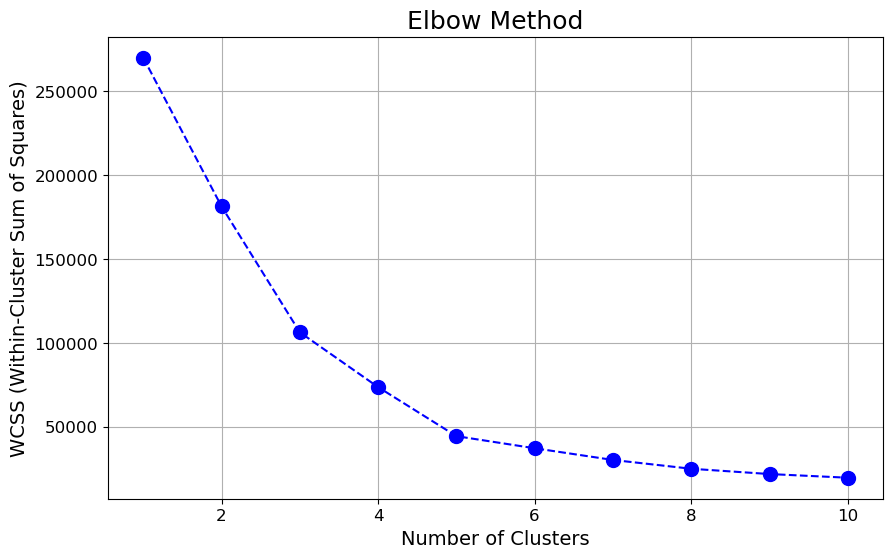

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--', color='blue', markersize=10)
plt.title('Elbow Method', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('WCSS (Within-Cluster Sum of Squares)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.show()

### Step 8: Applying K-means with Optimal Number of Clusters
#### Based on the Elbow Method, we can select 5 clusters (as an example)

In [8]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

### Step 9: Adding the Cluster Labels to the Dataset

In [9]:
df['Cluster'] = y_kmeans

### Step 10: Visualizing the Clusters using Seaborn

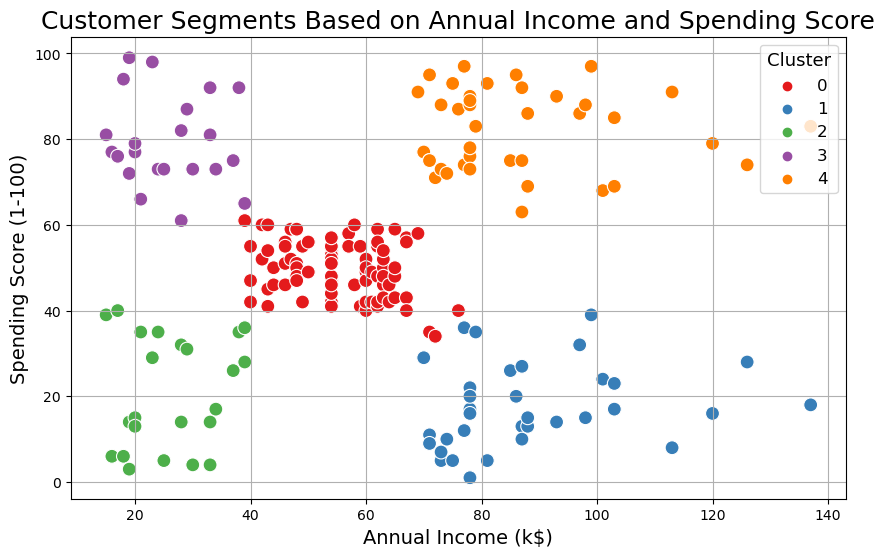

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set1', s=100)
plt.title('Customer Segments Based on Annual Income and Spending Score', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(title='Cluster', title_fontsize='13', loc='upper right', fontsize=12)
plt.grid(True)
plt.show()


### Step 11: Visualizing Clusters with Centroids

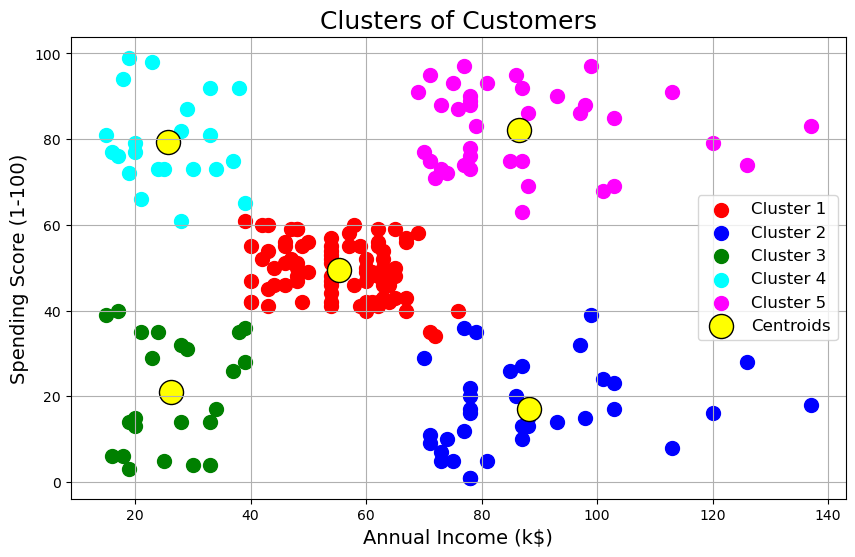

In [11]:
plt.figure(figsize=(10, 6))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(5):
    plt.scatter(X[y_kmeans == i]['Annual Income (k$)'], X[y_kmeans == i]['Spending Score (1-100)'],
                s=100, c=colors[i], label=f'Cluster {i+1}')
    
# Plot the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids', edgecolor='black')

plt.title('Clusters of Customers', fontsize=18)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

### Step 12: Additional Plot - Pairplot for Visualizing Clusters on Multiple Features
#### Using more features to explore clusters

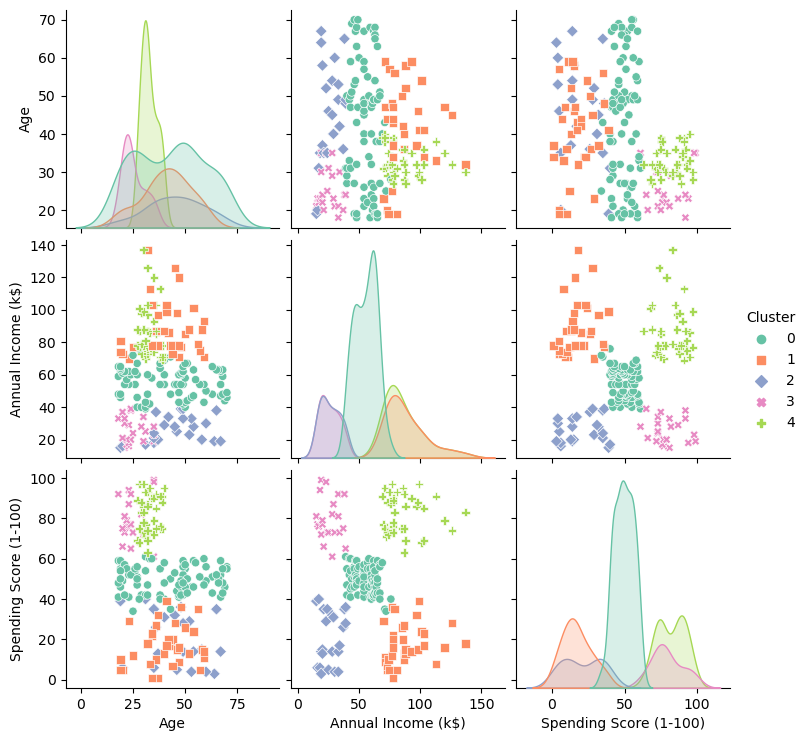

In [12]:
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Cluster']], 
             hue='Cluster', palette='Set2', markers=["o", "s", "D", "X", "P"])
plt.show()
